In [1]:
import itertools
import linecache
import os
import pprint

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [2]:
imfFull = "#548235"
imfTest = "#99C979"

knnFull = "#C55A11"
knnTest = "#ff5811"
normalizedKnnFull = "#4A76C6"
normalizedKnnTest = "#19C3FF"

average = "#FFC000"
popularity = "#F18F8F"
random = "#BFBFBF"

CorrelationWithUnbiasedEvaluation = "#C00000"
ExpectedIntersectionRatioInTopN = "#FFC000"
RatioOfTies = "#3333FF"
RatioOfTiesAtZero = "#006600"

rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
    "Correlation with unbiased evaluation": CorrelationWithUnbiasedEvaluation,
    "Expected intersection ratio in top n": ExpectedIntersectionRatioInTopN,
    "Ratio of ties": RatioOfTies,
    "Ratio of ties at zero": RatioOfTiesAtZero,
    "Sum of p-values": "black",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
# rec_colors = (
#     imfFull,
#     imfTest,
#     knnFull,
#     knnTest,
#     normalizedKnnFull,
#     normalizedKnnTest,
#     average,
#     popularity,
#     random,
# )

datasets = ["ml1m", "ml100k"]
class_splits = ["", "-male", "-female", "-young", "-old"]
splits = []
for d in datasets:
    for c in class_splits:
        splits.append(d + c)

pp.pprint(splits)

[   'ml1m',
    'ml1m-male',
    'ml1m-female',
    'ml1m-young',
    'ml1m-old',
    'ml100k',
    'ml100k-male',
    'ml100k-female',
    'ml100k-young',
    'ml100k-old']


In [3]:
data_dir = r"C:\Projects\RecSys2020\results\_mbd\\"

def plot_figure4(...

figure4.full

C:\Projects\RecSys2020\results\figure4.txt.ml1m.txt
yahoo
C:\Projects\RecSys2020\results\figure4.txt.yahoo.txt
figure4

ml1m
C:\Projects\RecSys2020\results\figure4.txt.ml1m.txt
ml1m-male
C:\Projects\RecSys2020\results\figure4.txt.ml1m-male.txt
ml1m-female
C:\Projects\RecSys2020\results\figure4.txt.ml1m-female.txt
ml1m-young
C:\Projects\RecSys2020\results\figure4.txt.ml1m-young.txt
ml1m-old
C:\Projects\RecSys2020\results\figure4.txt.ml1m-old.txt
ml100k
C:\Projects\RecSys2020\results\figure4.txt.ml100k.txt
ml100k-male
C:\Projects\RecSys2020\results\figure4.txt.ml100k-male.txt
ml100k-female
C:\Projects\RecSys2020\results\figure4.txt.ml100k-female.txt
ml100k-young
C:\Projects\RecSys2020\results\figure4.txt.ml100k-young.txt
ml100k-old
C:\Projects\RecSys2020\results\figure4.txt.ml100k-old.txt
figure5.gender+age.png

ml1m 
C:\Projects\RecSys2020\results\figure505.ml1m-nofill.txt
ml1m -male
C:\Projects\RecSys2020\results\figure505.ml1m-male-nofill.txt
ml1m -

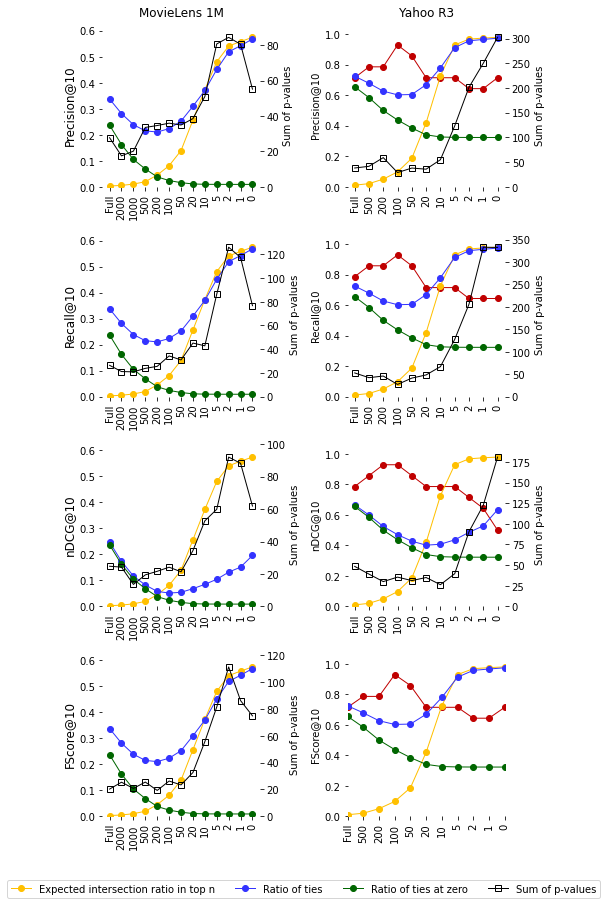

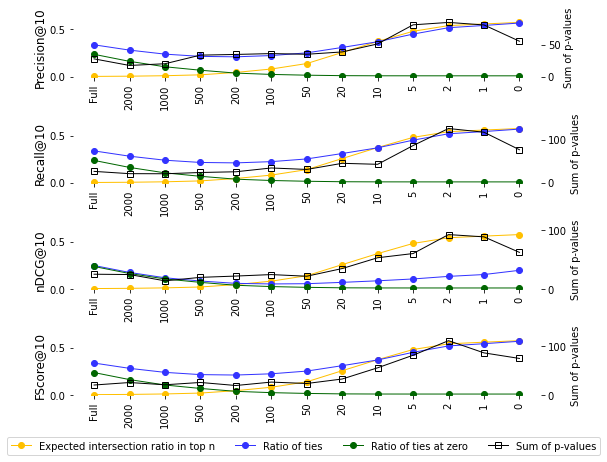

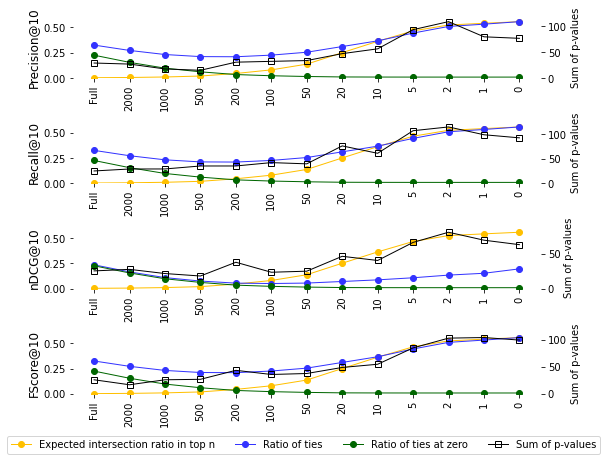

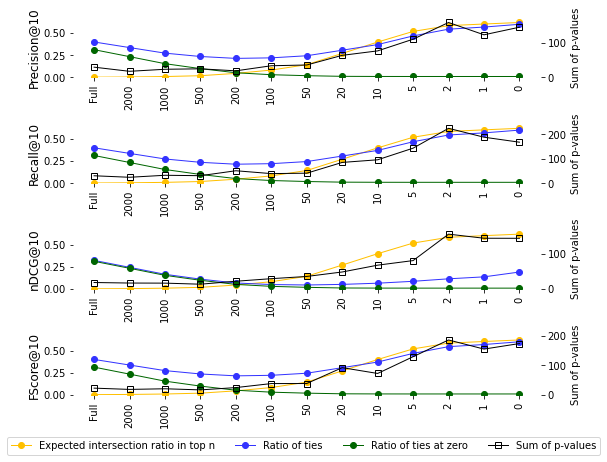

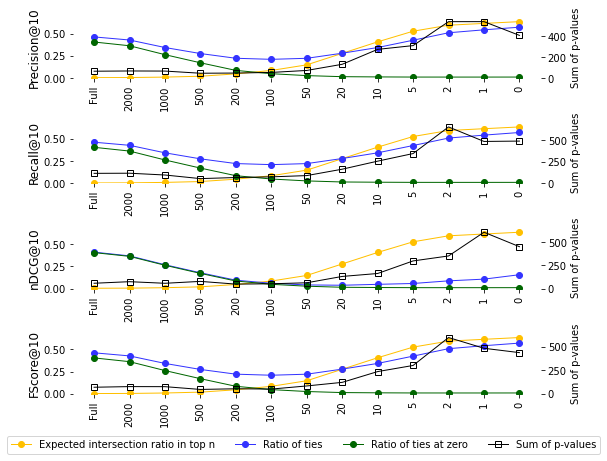

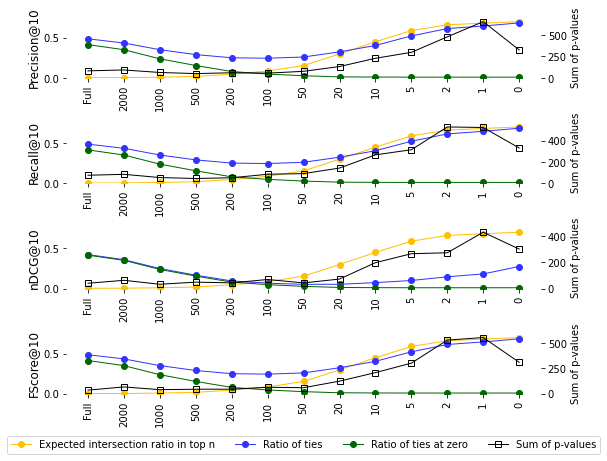

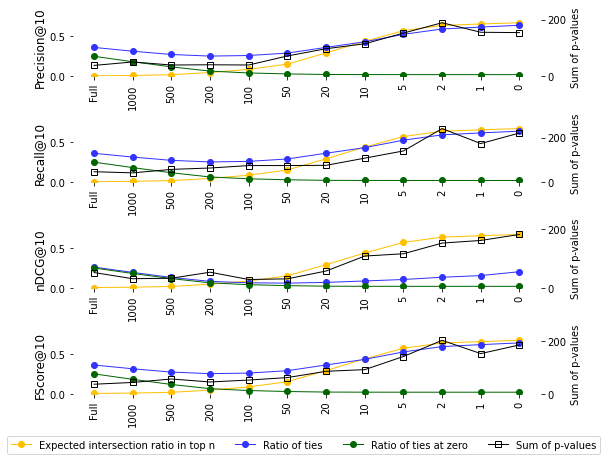

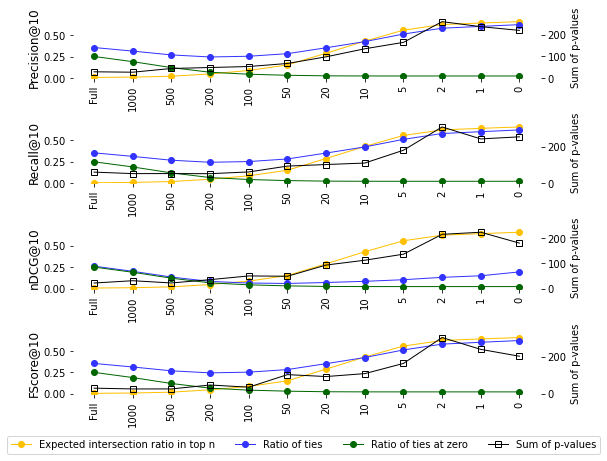

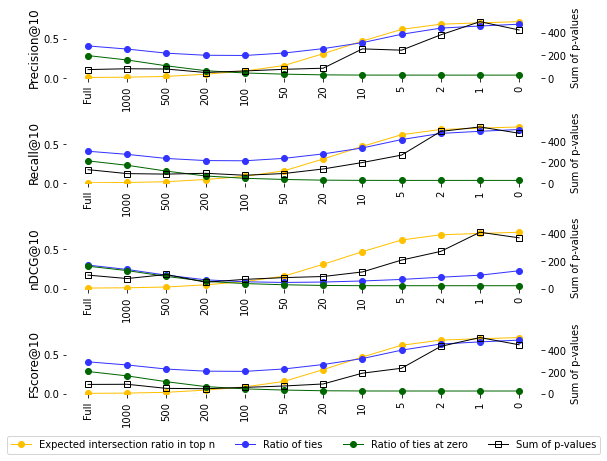

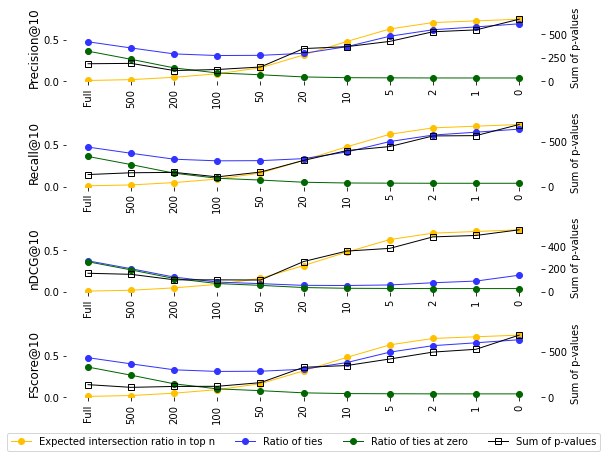

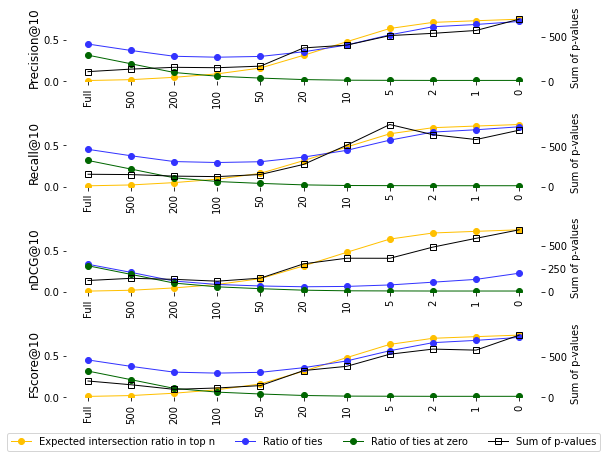

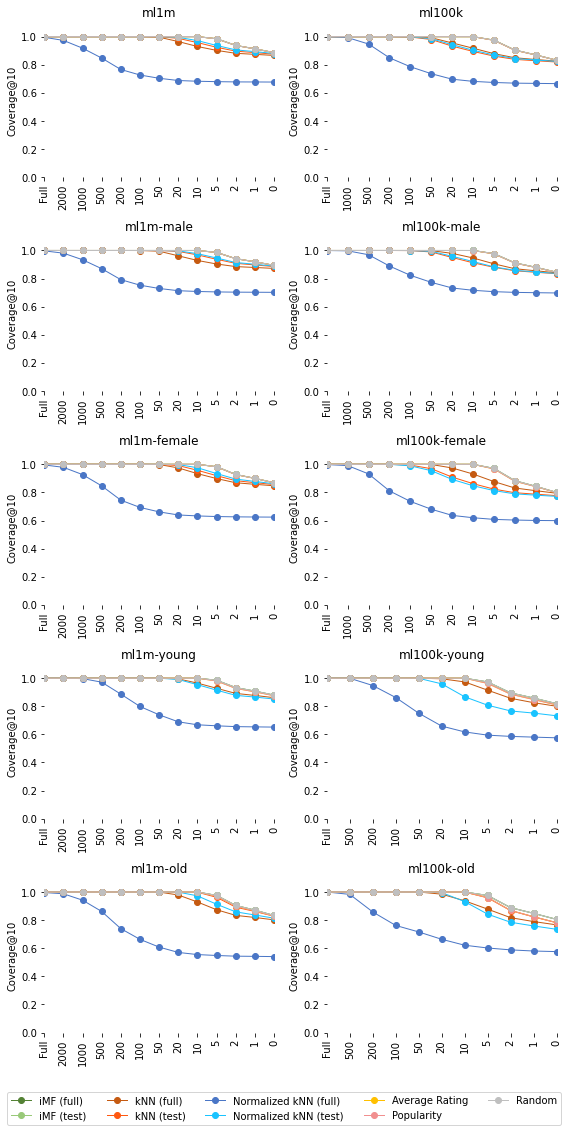

In [4]:
print("def plot_figure4(...\n")


def plot_metrics(data, ax, ylabel="System ranking", twinx=None, title=None):
    artists = []
    for rec in data.columns[1:]:
        x = list(range(len(data[rec])))
        artist = plt.Line2D(
            xdata=x, ydata=[data[rec]], lw=1, color=rec_colors_dict[rec], marker="o"
        )
        artists.append((rec, artist))
        ax.add_artist(artist)

    max_value = data.iloc[:, 1:].max().max()
    ax.set_ybound([0, max_value * 1.1])
    # ax.set_xbound([-0.1, len(data['Target size']) + 0.06])

    hide_spines(ax)

    ax.set_xticks(list(range(len(data["Target size"]))))
    ax.set_xticklabels(data["Target size"])
    ax.set_xticklabels(list(itertools.chain(data["Target size"].values[:-1], ["Full"])))
    ax.set_ylabel(ylabel)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    if twinx is not None and twinx.max() > 0:
        # print("twinx", twinx)
        label = "Sum of p-values"
        ax2 = ax.twinx()
        (e,) = ax2.plot(
            list(range(len(twinx))),
            twinx,
            label=label,
            lw=1,
            color="black",
            fillstyle="none",
            markeredgecolor="black",
            marker="s",
        )
        ax2.set_ylabel(label)
        max = twinx.max()
        ax2.set_ylim(0, max + 0.1 * max + 0.01)

        hide_spines(ax2)
        # ax2.legend(loc=1)
        # artists.append(ax2)
        artists.append((label, e))

    if title is not None:
        ax.set_title(title)

    return np.array(artists)


def hide_spines(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)


def get_figure_data(file_name):
    file = os.path.join(r"C:\Projects\RecSys2020\results", file_name)
    print(file)
    lines_with_metrics = [
        (i, linecache.getline(file, i + 1).strip())
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]
    if len(lines_with_metrics) == 1:
        lines_with_numbers = [
            (i, linecache.getline(file, i + 1).strip())
            for i, line in enumerate(open(file))
            if line[0].isdigit()
        ]
        rows = len(lines_with_numbers)
    else:
        rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3

    params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
    data = dict()
    for j, metric in enumerate(lines_with_metrics):
        metric_name = metric[1]
        metric_line = metric[0]
        data[metric_name] = pd.read_table(header=metric_line - j, **params)

    if "P@10" in data:
        data["Precision@10"] = data["P@10"]
    return data


def plot_figure4(dataset, ax1, ax2, ax3, ax4, legend=True, yahoo=None):
    data = get_figure_data("figure4.txt." + dataset + ".txt")

    rows = ["Precision@10", "Recall@10", "nDCG@10", "FScore@10"]

    twinx = "Sum of p-values"
    for ax, row in zip([ax1, ax2, ax3, ax4], rows):
        ax.set_ylabel(row, rotation=90, size="large")
        artists = plot_metrics(
            data[row].iloc[:, :-1],
            ax,
            ylabel=row,
            twinx=data[row][twinx],
        )
    [x.invert_xaxis() for x in [ax1, ax2, ax3, ax4]]

    if yahoo is not None:
        print("yahoo")
        ax1, ax2, ax3, ax4 = yahoo
        data = get_figure_data("figure4.txt.yahoo.txt")
        [x.invert_xaxis() for x in [ax1, ax2, ax3, ax4]]
        for ax, row in zip([ax1, ax2, ax3, ax4], rows):
            plot_metrics(
                data[row].iloc[:, :-1],
                ax,
                ylabel=row,
                twinx=data[row][twinx],
            )

    legened_items = [*{*itertools.chain.from_iterable([data[i].keys() for i in data])}]
    legened_items.remove("Target size")
    if legend == True:
        # plt.legend(artists[:,1], artists[:,0], bbox_to_anchor=(1.05, 1), loc="best")
        # fig.suptitle(dataset)
        fig.legend(
            artists[:, 1],
            artists[:, 0],
            loc="lower center",
            bbox_to_anchor=(0.5, -0.05),
            ncol=5,
        )

    return artists


print("figure4.full\n")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 8))

artists = plot_figure4(
    "ml1m",
    axes[0, 0],
    axes[1, 0],
    axes[2, 0],
    axes[3, 0],
    legend=True,
    yahoo=(axes[0, 1], axes[1, 1], axes[2, 1], axes[3, 1]),
)

axes[0][0].set_title("MovieLens 1M")
axes[0][1].set_title("Yahoo R3")


# fig.legend(
#     artists[:, 1],
#     artists[:, 0],
#     loc="lower center",
#     bbox_to_anchor=(0.5, -0.05),
#     ncol=5,
# )

fig.set_size_inches(7, 12)
fig.tight_layout()


png = os.path.join(data_dir, "figure4.full.png")
# fig.savefig(png, format="png", dpi=300, transparent=False)
plt.show()

print("figure4\n")

for split in splits:
    print(split)

    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))
    artists = plot_figure4(split, axes[0], axes[1], axes[2], axes[3])
    png = os.path.join(data_dir, "figure4." + split + ".png")
    fig.set_size_inches(8, 6)
    fig.tight_layout()
    fig.savefig(png, format="png", dpi=300, transparent=False)
plt.show()

print("figure5.gender+age.png\n")


def plot_figure505(dataset, ax, title):
    data = get_figure_data("figure505." + dataset + "-nofill.txt")
    coverage = data["Coverage@10"]
    artists = plot_metrics(coverage, ax, ylabel="Coverage@10", title=title)
    # legened_items = [*{*itertools.chain.from_iterable([data[i].keys() for i in data])}]
    # legened_items.remove('Target size')
    return artists  # , legened_items


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 15))

for i, dataset in enumerate(datasets):
    for j, split in enumerate(class_splits):
        print(dataset, split)
        artists = plot_figure505(dataset + split, axes[j, i], dataset + split)
        axes[j, i].invert_xaxis()

# plt.legend(handles=[ mpatches.Patch(color=rec_colors_dict[name], label=name, lw=1) for name in rec_colors_dict],
#            bbox_to_anchor=(1.05, 1),
#     loc="upper left",
#     title_fontsize="xx-large",)
fig.legend(
    artists[:, 1],
    artists[:, 0],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=5,
)
fig.tight_layout()
png = os.path.join(data_dir, "figure5.full.png")
fig.savefig(png, format="png", dpi=300)
plt.show()

In [5]:
print("figure5.full2.png\n")
# fig, (ax1, ax2) = plt.subplots(1, 2)
# split = "ShuffleSplit"
#
# coverage = pd.read_table(
#     r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
#     sep="\t",
#     header=4,
#     nrows=13,
# )
# plot_metrics(coverage, ax1, ylabel="Coverage@10", title="MovieLens1M")
#
# coverage = pd.read_table(
#     r"C:\Projects\RecSys2020\results\KFold\figure5.txt",
#     sep="\t",
#     header=4,
#     nrows=11,
# )
# artists = plot_metrics(coverage, ax2, ylabel="Coverage@10", title="Yahoo!")
#
# [x.invert_xaxis() for x in [ax1, ax2]]
#
# plt.legend(
#     artists,
#     coverage.keys()[1:],
#     bbox_to_anchor=(1.05, 1),
#     loc="upper left",
#     # title="Recommender",
#     title_fontsize="xx-large",
# )
# fig.set_size_inches(8, 3)
# fig.tight_layout()
# png = os.path.join(data_dir, "figure5.full2.png")
# fig.savefig(png, format="png", dpi=300)
# plt.show()
# plt.close("all")

figure5.full2.png



In [6]:
print("empty.png\n")

empty.png

